# Random Forest Regression for Spotify Song Popularity Prediction

In [ ]:
#Matthew Allicock (100860998) - Second 50% of code/model
#Zuhaib Shafi (100820952) - First 50% of code/model
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [2]:

# Load dataset
dataset_path = r'C:\Users\matth\MachineLearning\ML Final Report\Most Streamed Spotify Songs 2024.csv' # Replace with your file path
data = pd.read_csv(dataset_path, encoding='latin1')
data.head()  # Display the first few rows of the dataset


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [3]:

# Preprocess dataset
columns_to_clean = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 
                    'Track Score', 'Shazam Counts']  # Columns to clean

for column in columns_to_clean:
    data[column] = data[column].replace(',', '', regex=True).astype(float)  # Remove commas and convert to float

features = ['Track Score', 'Spotify Playlist Count', 'Shazam Counts']  # Features used for prediction
target = 'Spotify Streams'  # Target variable

data_cleaned = data.dropna(subset=features + [target])  # Drop rows with missing values in features or target

X = data_cleaned[features]  # Input features
y = data_cleaned[target]  # Target output

X.head()  # Display the first few rows of the cleaned features


,Track Score,Spotify Playlist Count,Shazam Counts
0,725.4,30716.0,2669262.0
1,545.9,28113.0,1118279.0
2,538.4,54331.0,5285340.0
3,444.9,269802.0,11822942.0
4,423.3,7223.0,457017.0


In [4]:

scaler = StandardScaler()  # Initialize the scaler for standardizing features
X_scaled = scaler.fit_transform(X)  # Scale the features to have a mean of 0 and standard deviation of 1

poly = PolynomialFeatures(degree=2, include_bias=False)  # Initialize polynomial feature transformer
X_poly = poly.fit_transform(X_scaled)  # Add polynomial features to capture non-linear relationships

X_poly[:5]  # Display the first five rows of the transformed features


array([[ 1.76977986e+01, -4.57347526e-01,  6.40785676e-02,
         3.13212075e+02, -8.09404440e+00,  1.13404958e+00,
         2.09166759e-01, -2.93061744e-02,  4.10606283e-03],
       [ 1.30499045e+01, -4.93956595e-01, -3.23628488e-01,
         1.70300008e+02, -6.44608641e+00, -4.22332087e+00,
         2.43993118e-01,  1.59858426e-01,  1.04735398e-01],
       [ 1.28557028e+01, -1.25221834e-01,  7.18032800e-01,
         1.65269095e+02, -1.60981469e+00,  9.23081630e+00,
         1.56805078e-02, -8.99133844e-02,  5.15571102e-01],
       [ 1.04346550e+01,  2.90520183e+00,  2.35227020e+00,
         1.08882024e+02,  3.03147787e+01,  2.45451279e+01,
         8.44019768e+00,  6.83381968e+00,  5.53317507e+00],
       [ 9.87535405e+00, -7.87757387e-01, -4.88927490e-01,
         9.75226177e+01, -7.77938310e+00, -4.82833207e+00,
         6.20561701e-01,  3.85156242e-01,  2.39050090e-01]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)  # Split data into training and testing sets
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")  # Display sizes of the splits


Training set size: (3177, 9), Testing set size: (795, 9)


In [6]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10, min_samples_split=5)  # Initialize Random Forest model with hyperparameters
rf_model.fit(X_train, y_train)  # Train the model on the training data


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [7]:

y_pred = rf_model.predict(X_test)  # Make predictions on the test data

mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R² score

print("Random Forest Results:")  # Print model evaluation results
print(f"MSE: {mse}")  # Display MSE
print(f"RMSE: {rmse}")  # Display RMSE
print(f"R²: {r2}")  # Display R² score



Random Forest Results:
MSE: 5.585871267389131e+16
RMSE: 236344478.83098796
R²: 0.8173667084165218


## Visualizing Results

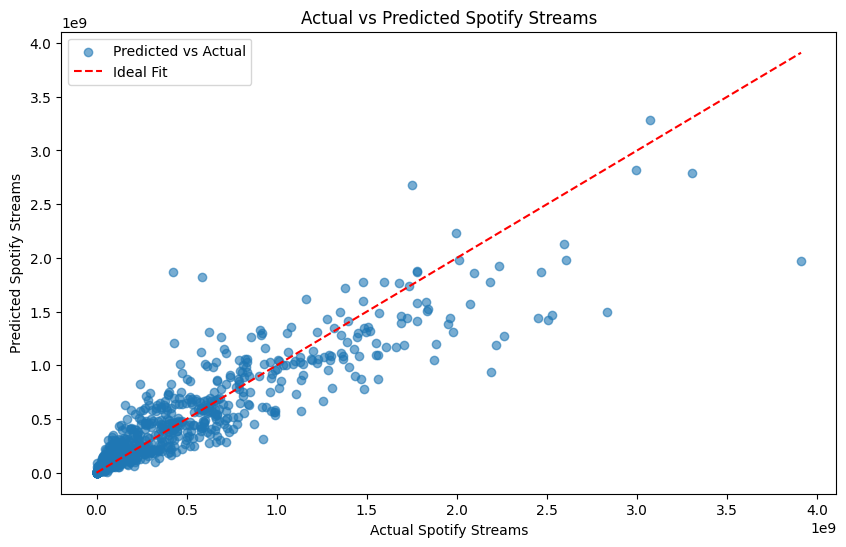

In [8]:

import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Spotify Streams')
plt.ylabel('Predicted Spotify Streams')
plt.title('Actual vs Predicted Spotify Streams')
plt.legend()
plt.show()
